In [1]:
from PIL import Image
import cv2
import skimage
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
image_dir = './raccoons'
images = [ Image.open(os.path.join(image_dir, f)) for f in os.listdir(image_dir)]

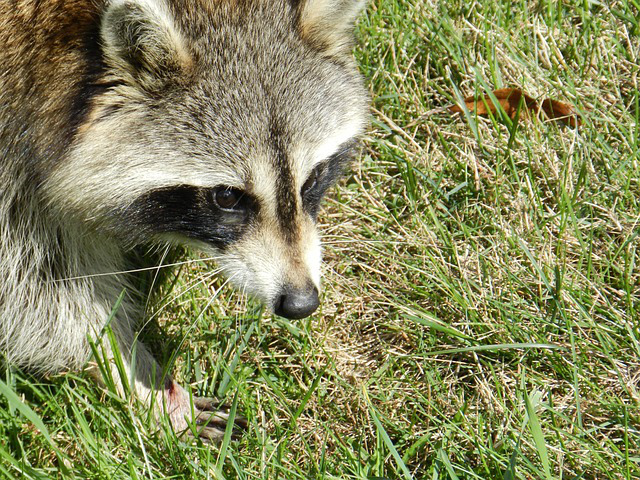

In [3]:
im = images[0]
im

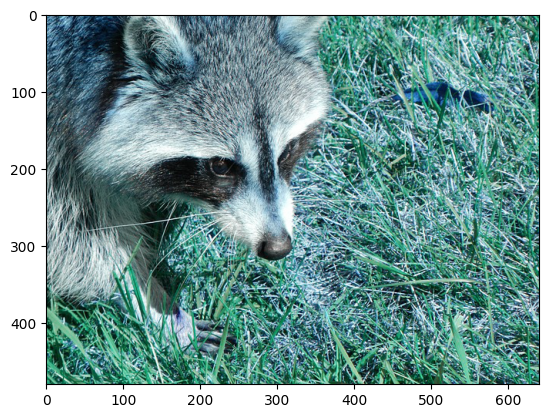

In [4]:
im_1 = cv2.cvtColor(np.array(im), cv2.COLOR_RGB2BGR)
plt.imshow(im_1)

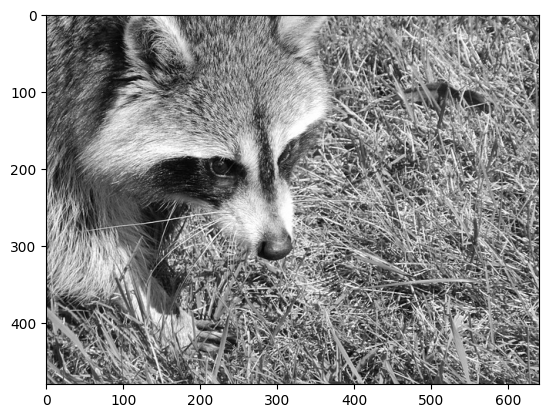

In [5]:
im_1_gray = cv2.cvtColor(im_1, cv2.COLOR_BGR2GRAY)
plt.imshow(im_1_gray, cmap='gray')

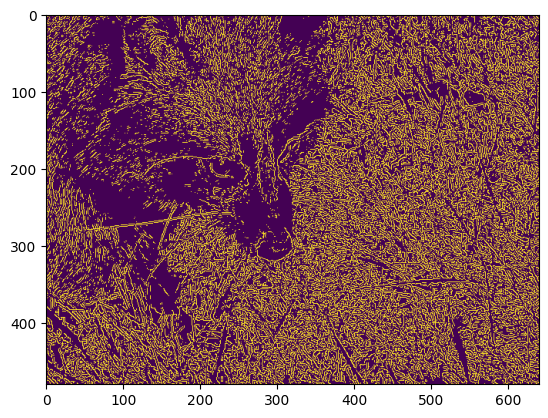

In [6]:
plt.imshow(cv2.Canny(im_1_gray, 250, 255))

In [7]:
from skimage.filters import sobel

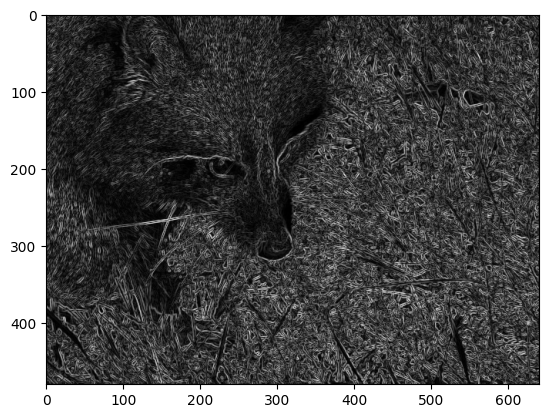

In [8]:
plt.imshow(sobel(im_1_gray), cmap='gray')

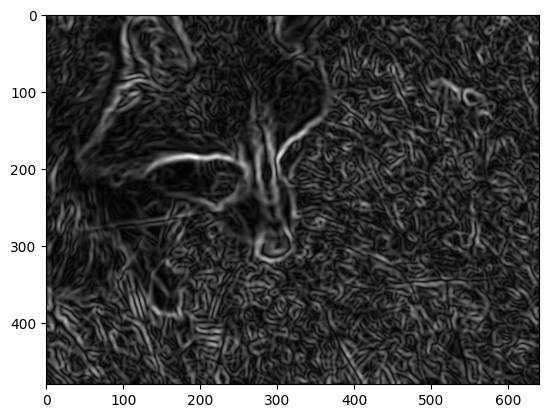

In [9]:
im_1_gray = sobel(cv2.GaussianBlur(im_1_gray, (15, 15), 0))
plt.imshow(im_1_gray, cmap='gray')

In [10]:
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_x, sobel_y

(array([[ 1,  0, -1],
        [ 2,  0, -2],
        [ 1,  0, -1]]),
 array([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]]))

In [11]:
im_1_sobel_x = cv2.filter2D(im_1_gray, -1, sobel_x)
im_1_sobel_y = cv2.filter2D(im_1_gray, -1, sobel_y)

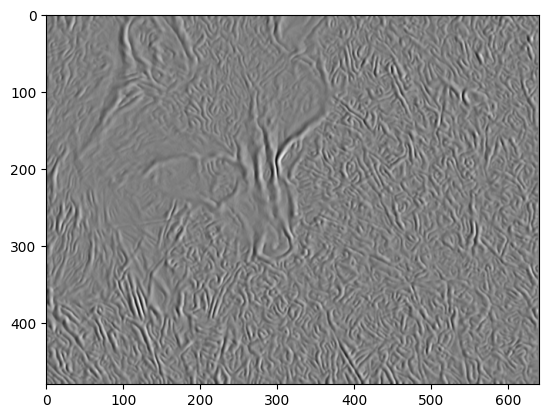

In [12]:
plt.imshow(im_1_sobel_x, cmap='gray')


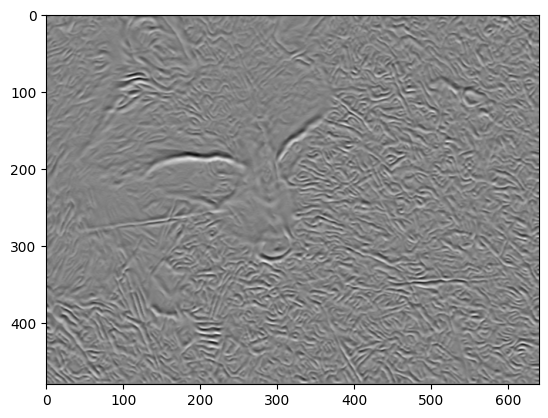

In [13]:
plt.imshow(im_1_sobel_y, cmap='gray')

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., 10., ...,  0.,  0.,  0.],
        [ 0.,  0., 14., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  7.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(640, 10)),
 array([-3.16231154e-01, -2.53037071e-01, -1.89842988e-01, -1.26648905e-01,
        -6.34548218e-02, -2.60738773e-04,  6.29333442e-02,  1.26127427e-01,
         1.89321510e-01,  2.52515593e-01,  3.15709676e-01]),
 <a list of 640 BarContainer objects>)

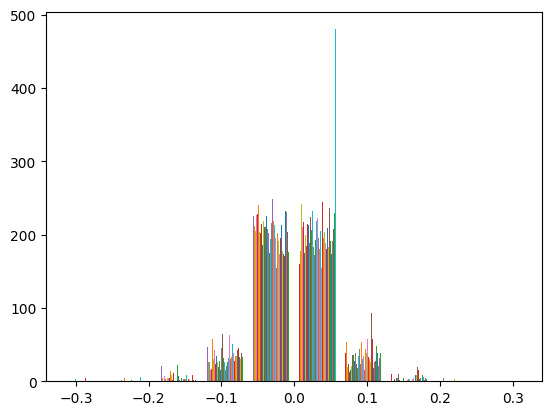

In [14]:
plt.hist(im_1_sobel_x)

In [15]:
# im_1_sobel_x_thresh = (im_1_sobel_x > 110) & (im_1_sobel_x < 190)
# plt.imshow(im_1_sobel_x_thresh, cmap='gray')

In [16]:
# im_1_sobel_y_thresh = (im_1_sobel_y > 110) & (im_1_sobel_y < 190)
# plt.imshow(im_1_sobel_y_thresh, cmap='gray')

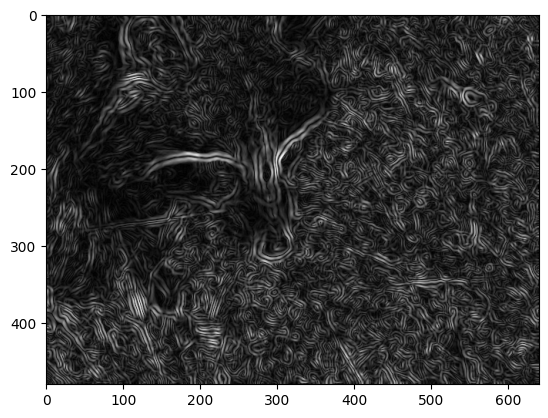

In [17]:
# filtered_xy = np.sqrt(np.square(im_1_sobel_x_thresh) + np.square(im_1_sobel_y_thresh))
filtered_xy = np.sqrt(np.square(im_1_sobel_x) + np.square(im_1_sobel_y))
plt.imshow(filtered_xy, cmap='gray')

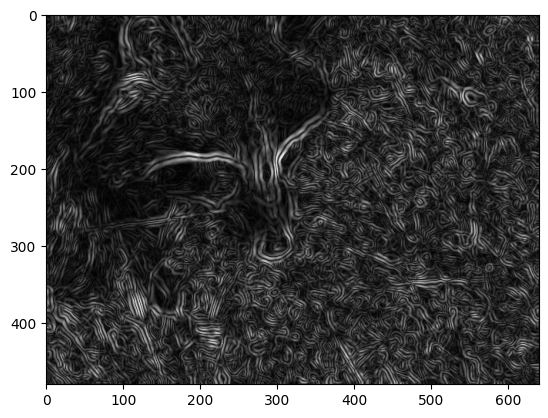

In [21]:
ski_filtered = skimage.filters.sobel(im_1_gray)
plt.imshow(ski_filtered, cmap='gray')

In [28]:
diff_img = abs(ski_filtered - filtered_xy)

(array([[300., 113.,  48., ...,   0.,   0.,   0.],
        [171., 178.,  85., ...,   0.,   0.,   0.],
        [180., 181.,  77., ...,   0.,   0.,   0.],
        ...,
        [ 98., 173., 135., ...,   0.,   0.,   0.],
        [113., 154., 136., ...,   0.,   0.,   0.],
        [234., 115.,  83., ...,   0.,   0.,   0.]], shape=(640, 10)),
 array([7.14032396e-19, 2.68583918e-02, 5.37167837e-02, 8.05751755e-02,
        1.07433567e-01, 1.34291959e-01, 1.61150351e-01, 1.88008743e-01,
        2.14867135e-01, 2.41725527e-01, 2.68583918e-01]),
 <a list of 640 BarContainer objects>)

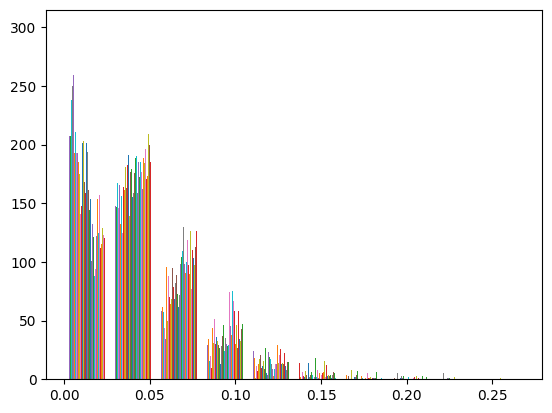

In [29]:
plt.hist(diff_img)

In [35]:
np.sqrt(np.sum(np.square(diff_img)/diff_img.size))

np.float64(0.05466932406987968)